In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [16]:
import cv2
import os

data_path='C:\\Users\\Compaq\\Desktop\\bt_dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'no_tumour': 0, 'tumour': 1}
['no_tumour', 'tumour']
[0, 1]


In [18]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [19]:
import numpy as np


data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [22]:
np.save('tdata',data)
np.save('tutarget',new_target)

In [23]:
import numpy as np

data=np.load('C:\\Users\\Compaq\\Desktop\\tdata.npy')
target=np.load('C:\\Users\\Compaq\\Desktop\\tutarget.npy')

#loading the save numpy arrays in the previous code

In [24]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.45))

model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=9,padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Conv2D(filters=36, kernel_size=9, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.25))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.15))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Take a look at the model summary
model.summary()

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['acc'])
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        3904      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 16)        20752     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 36)          4

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [27]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
2/2 [==============================] - 33s 12s/step - loss: 0.7249 - accuracy: 0.4231 - val_loss: 0.6132 - val_accuracy: 0.7692
INFO:tensorflow:Assets written to: model-001.model\assets
Epoch 2/20
2/2 [==============================] - 27s 12s/step - loss: 0.7041 - accuracy: 0.6154 - val_loss: 0.6686 - val_accuracy: 0.7692
Epoch 3/20
2/2 [==============================] - 27s 12s/step - loss: 0.6658 - accuracy: 0.6154 - val_loss: 0.7125 - val_accuracy: 0.3846
Epoch 4/20
2/2 [==============================] - 27s 12s/step - loss: 0.6424 - accuracy: 0.7308 - val_loss: 0.6068 - val_accuracy: 0.7692
INFO:tensorflow:Assets written to: model-004.model\assets
Epoch 5/20
2/2 [==============================] - 27s 12s/step - loss: 0.6022 - accuracy: 0.6154 - val_loss: 0.6990 - val_accuracy: 0.5385
Epoch 6/20
2/2 [==============================] - 27s 12s/step - loss: 0.5341 - accuracy: 0.8077 - val_loss: 0.6277 - val_accuracy: 0.6154
Epoch 7/20
2/2 [==============================] - 

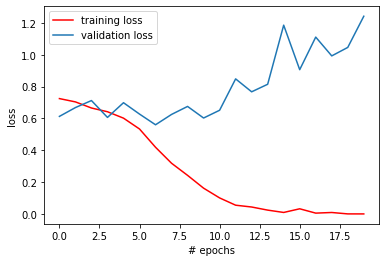

In [28]:

from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

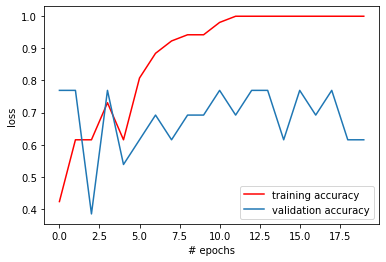

In [29]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
print(model.evaluate(test_data,test_target))

1/1 [==============================] - 1s 1s/step - loss: 0.1325 - accuracy: 1.0000
[0.13250228762626648, 1.0]


In [33]:
model.save("tumour detectionf.h5")

In [34]:
from keras.models import load_model
import cv2
import numpy as np

In [37]:
model = load_model('C:\\Users\\Compaq\\Desktop\\tumour detectionf.h5')
source=cv2.VideoCapture(1)

labels_dict={1:'tumour',0:'NO tumour'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [41]:
 img=cv2.imread('C:\\Users\\Compaq\Desktop\\bt_dataset\\no_tumour\\thLOXP4XSR.jpg')
 gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
 resized=cv2.resize(gray,(100,100))
 normalized=resized/255.0
 reshaped=np.reshape(normalized,(1,100,100,1))
 result=model.predict(reshaped) 
 label=np.argmax(result,axis=1)[0]
 l=labels_dict[label]
 l

    
    

'NO tumour'